## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
import warnings
from helper import create_df_sc, wrap_labels
from helper import millions_formatter, thousands_formatter


## Configuration

In [3]:
# %matplotlib inline
# plt.style.use('fivethirtyeight')
# Set style
sns.set_theme(context='notebook',style='darkgrid')
# Suppress all warnings
warnings.filterwarnings("ignore")

## National Travel Survey
[National Travel Survey](https://www150.statcan.gc.ca/n1/daily-quotidien/241128/dq241128d-cansim-eng.htm)
Table 24-10-0045-01: Travel by Canadian residents in Canada and abroad by trip purpose (x 1,000)
- Quarterly
- Canadian Travels: domestic and international

### Create DataFrame

In [4]:
# read the table
pid = "2410004501"
start_date = "20180101"
selected_members = "[[1,2,3,4],[1,2,3],[1,2,3,4,5,6],[1]]"
period = 'Q'
df = create_df_sc(pid,start_date,selected_members,period)

https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2410004501&latestN=&startDate=20180101&endDate=&csvLocale=en&selectedMembers=%5B%5B1%2C2%2C3%2C4%5D%2C%5B1%2C2%2C3%5D%2C%5B1%2C2%2C3%2C4%2C5%2C6%5D%2C%5B1%5D%5D 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1597 entries, 2018-01-01 to 2024-04-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO                1597 non-null   object
 1   Trip duration      1597 non-null   object
 2   Main trip purpose  1597 non-null   object
 3   Statistics         1597 non-null   object
 4   VALUE              1597 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 74.9+ KB
None 

                 GEO Trip duration       Main trip purpose       Statistics  \
REF_DATE                                                                      
2023-04-01  Overseas     Overnight  Other personal reasons  Number of trips   
2

### Data Transformations

In [9]:
# Rename columns and index
df=df.rename(columns={'GEO': 'Destination','VALUE': 'Travel'})
df=df.rename_axis('Date')

# multipy values by 1000
df['Travel']=1000*df['Travel']

### Total Number of Travels in 2023 by Destination
* 90 per cent of travels are domestic

,Travel,Percentage
Destination,,
"Total, all countries and regions","319,062,000",100.0%
Canada,"285,058,000",89.3%
United States,"25,402,000",8.0%
Overseas,"8,601,000",2.7%


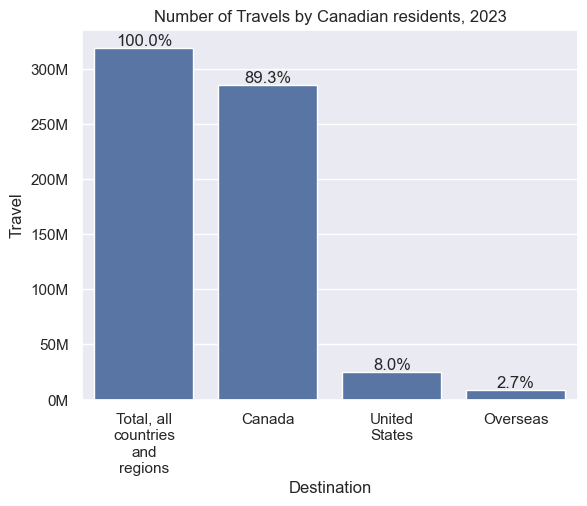

In [10]:
#conditions
cond1 = df.index.year == 2023
cond2 = df['Trip duration'] =='Total, all trip durations'
cond3 = df['Main trip purpose'] == 'Total, all trip purposes'

# filter dataframe
df1 = df[cond1 & cond2 & cond3]

# group by destination
df2= pd.DataFrame(df1.groupby('Destination')['Travel'].sum().
    sort_values(ascending=False))

#total and percentage
total = df2.iloc[0]['Travel']
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',    # Thousands separator
    'Percentage': '{:.1%}'  # Format as percentage
})

# display table
display(styler)

# bar chart
ax = sns.barplot(data=df2,x='Destination',y='Travel')
ax.set( title='Number of Travels by Canadian residents, 2023')
# million format for y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
# wrap long x-axis labels
wrap_labels(ax, 10)
# Add Data labels
for i, p in enumerate(ax.patches):
    percentage = df2['Percentage'][i]
    ax.annotate(f'{percentage:.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0))   

### Canadian Travels by Destination: All countries, Canada, US, and Overseas - Historical Trends
* Seasonality in domestic travels
* Despite population growth in recent years, travel hasn't reached pre-covid levels
* US is the first destination for international travels

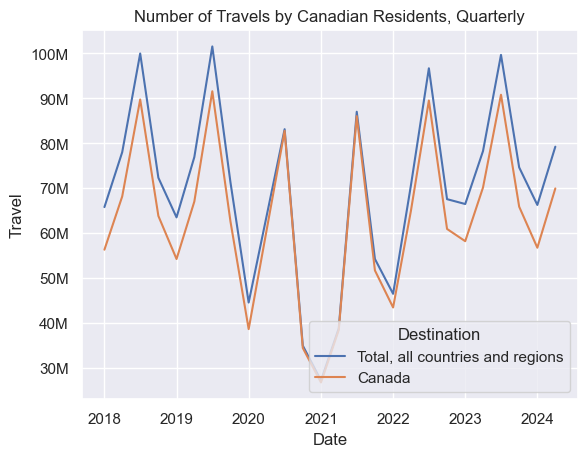

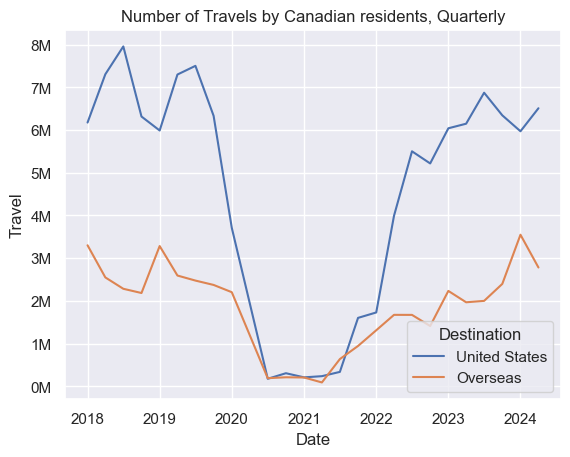

In [11]:
# conditions - domestic and Total
cond1 = df['Trip duration'] == 'Total, all trip durations'
cond2 = df['Main trip purpose'] == 'Total, all trip purposes'
cond3 = (df['Destination'] == 'Total, all countries and regions') | \
    (df['Destination'] == 'Canada')

# filter dataframe
df1 = df[cond1 & cond2 & cond3]

# plot
ax1 = sns.lineplot(data=df1, x='Date', y='Travel',hue='Destination')
ax1.set(title='Number of Travels by Canadian Residents, Quarterly')
# legend location
ax1.legend(loc='lower right',title='Destination')
#format y-axis
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

# conditions: US and overseas
cond1 = df['Trip duration'] == 'Total, all trip durations'
cond2 = df['Main trip purpose'] == 'Total, all trip purposes'
cond3 = (df['Destination'] == "United States") | (df['Destination'] 
        == "Overseas")

#filter dataframe
df1 = df[cond1 & cond2 & cond3]

#plot
ax2=sns.lineplot(data=df1, x='Date', y='Travel',hue='Destination')
ax2.set(title='Number of Travels by Canadian residents, Quarterly')
# set legend location
ax2.legend(loc='lower right',title='Destination')
#y-axis format
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


## Canadians International Travels, by Trip Purpose, 2023

### Destination: US

,Travel,Percentage
Main trip purpose,,
"Total, all trip purposes","25,402,000",100.0%
"Holiday, leisure or recreation","13,021,000",51.3%
Visit friends or relatives,"5,015,000",19.7%
"Shopping, non-routine","3,425,000",13.5%
Other personal reasons,"954,000",3.8%
"Personal conference, convention or trade show","426,000",1.7%


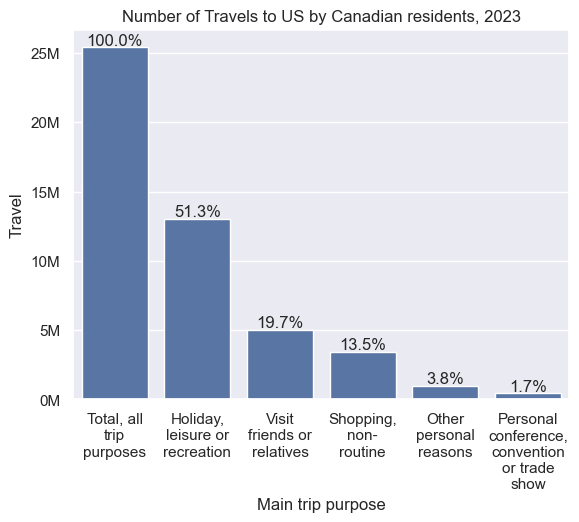

In [12]:
# group by travel purpose
# conditions
cond1 = df.index.year == 2023
cond2 = df['Trip duration'] == 'Total, all trip durations'
cond3 = df['Destination'] == 'United States'

# filter dataframe
df1 = df[cond1 & cond2 & cond3]

# group by travel purpose
df2 = pd.DataFrame(df1.groupby('Main trip purpose')['Travel'].sum(). \
        sort_values(ascending=False))

#total and percentage of total
total = df2.iloc[0]['Travel']
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',    # Thousands separator
    'Percentage': '{:.1%}'  # Format as percentage
})

# display table
display(styler)

# plot
ax = sns.barplot(data=df2,x='Main trip purpose',y='Travel')
ax.set( title='Number of Travels to US by Canadian residents, 2023')
# format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
# wrap long labels
wrap_labels(ax, 10)
# add data points
for i, p in enumerate(ax.patches):
    percentage = df2['Percentage'][i]
    ax.annotate(f'{percentage:.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0)) 


### Destination: Overseas

,Travel,Percentage
Main trip purpose,,
"Total, all trip purposes","8,601,000",100.0%
"Holiday, leisure or recreation","5,704,000",66.3%
Visit friends or relatives,"2,122,000",24.7%
Other personal reasons,"222,000",2.6%
"Personal conference, convention or trade show","48,000",0.6%
"Shopping, non-routine","10,000",0.1%


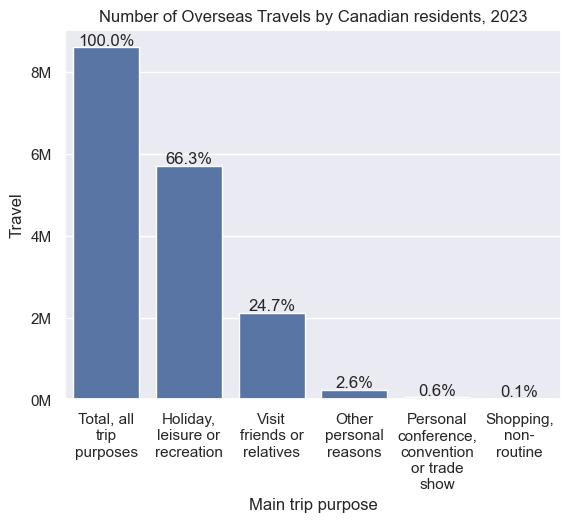

In [13]:
# group by travel purpose
# conditions
cond1 = df.index.year == 2023
cond2 = df['Trip duration'] == 'Total, all trip durations'
cond3 = df['Destination'] == 'Overseas'

# filter data frME
df1 = df[cond1 & cond2 & cond3]

#grouup by travel purpose
df2 = pd.DataFrame(df1.groupby('Main trip purpose')['Travel'].sum(). \
        sort_values(ascending=False))

#total and percentage
total = df2.iloc[0]['Travel']
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',# Thousands separator
    'Percentage': '{:.1%}'  # Format as percentage
})

# display table
display(styler)

# polt
ax = sns.barplot(data=df2,x='Main trip purpose',y='Travel')
ax.set( title='Number of Overseas Travels by Canadian residents, 2023')
# format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#wrap long labels
wrap_labels(ax, 10)
# add data points
for i, p in enumerate(ax.patches):
    percentage = df2['Percentage'][i]
    ax.annotate(f'{percentage:.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0)) 